In [3]:
import pandas as pd
import graphlab as gl
import numpy as np
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.fontsize'] = 'x-large'


A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.8.4.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
2016-03-18 12:56:16,695 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.4 started. Logging: /tmp/graphlab_server_1458320175.log


This non-commercial license of GraphLab Create is assigned to jlorince@indiana.edu and will expire on April 16, 2016. For commercial licensing options, visit https://dato.com/buy/.


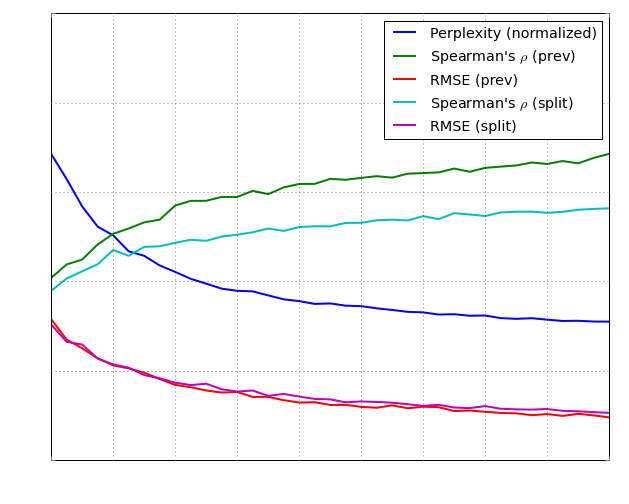

In [39]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col)]
ax = lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)",r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

In [7]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

In [77]:
lda_summary.xs(['fm',l],level=['source','method']).reset_index().set_index('k')['median']

k
10     0.010870
20     0.032086
30     0.044053
40     0.058824
50     0.076087
60     0.086538
70     0.102703
80     0.107143
90     0.121739
100    0.136000
110    0.141631
120    0.148305
130    0.153439
140    0.161850
150    0.170732
160    0.169154
170    0.179012
180    0.181347
190    0.190840
200    0.193548
Name: median, dtype: float64

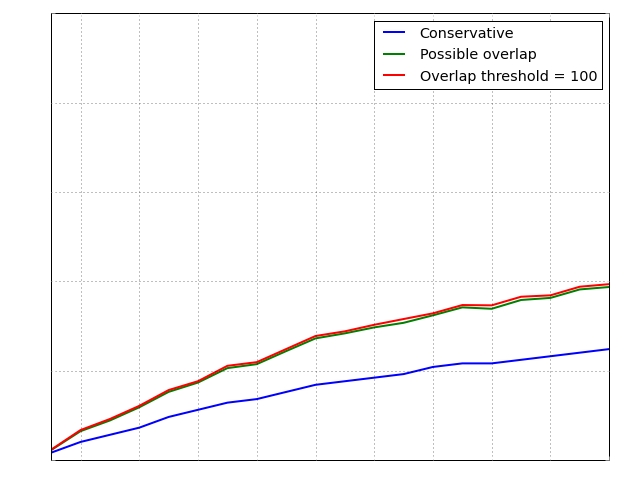

In [84]:
for d in [lda_summary,mf_summary]:
    break
    fig,axes = plt.subplots(2,3,figsize=(14,8))
    flat = axes.flat
    for l in ['all','possible','25','50','100','150']:
        data=d.xs(['fm',l],level=['source','method'])['median'].unstack()
        if len(data)>0:
            ax = flat.next()
            data.plot(title=l,ax=ax,ylim=[0,.5],lw=2,)
            l = ax.get_legend()
            for text in l.get_texts():
                text.set_color("black")
            t = l.get_title()
            t.set_text("KNN")
            t.set_color("black")
            t.set_fontsize("x-large")
            ax.grid()
            ax.set_ylabel("Median proportion overlap")
            ax.set_xlabel("K (number of topics)")
fig,ax = plt.subplots(1,1)
lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative')
lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap')
lda_summary.xs(['fm','100',250],level=['source','method','topN'])['median'].plot(
                                                                ax=ax,lw=2,label="Overlap threshold = 100")
ax.set_ylim(0,0.5)
l = ax.legend()
for text in l.get_texts():
    text.set_color("black")
ax.set_xticks(np.arange(20,201,20))
ax.grid()
ax.set_xlabel("K (number of topics)")
ax.set_ylabel("Median proportion overlap")

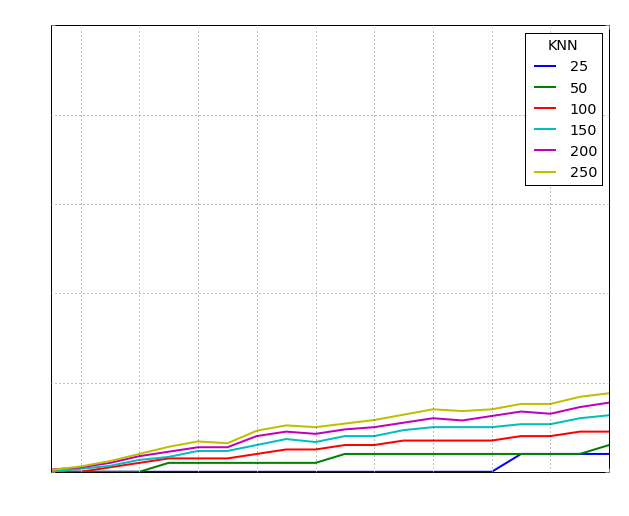

In [38]:
ax = lda_summary.xs('split',level='source').reset_index().pivot(index='k',
                        columns='topN',values='median').plot(ylim=(0,1),lw=2)
l = ax.get_legend()
for text in l.get_texts():
    text.set_color("black")
t = l.get_title()
t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
ax.set_ylabel("Median proportion overlap")
ax.set_xlabel("K (number of topics)")
ax.set_title('"split" method')
ax.set_xticks(np.arange(20,201,20))
ax.grid(which='both')

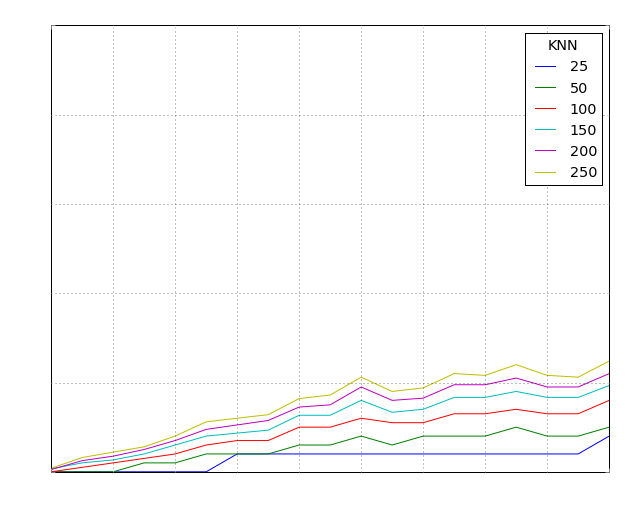

In [37]:
d = lda_summary
ax=d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1))
l = ax.get_legend()
for text in l.get_texts():
    text.set_color("black")
t = l.get_title()
t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
ax.set_ylabel("Median proportion overlap")
ax.set_xlabel("K (number of topics)")
ax.set_title('"prev" method')
ax.grid(which='both')

In [40]:
artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

In [5]:
artist_data.head()

,artist_id,artist_name,scrobbles,listeners
0,1,slipknot,5168441,45909
1,5,ultraspank,21797,1262
2,7,finger+eleven,452415,17830
3,10,strata,87516,3022
4,12,%c3%9cnloco,71511,6095


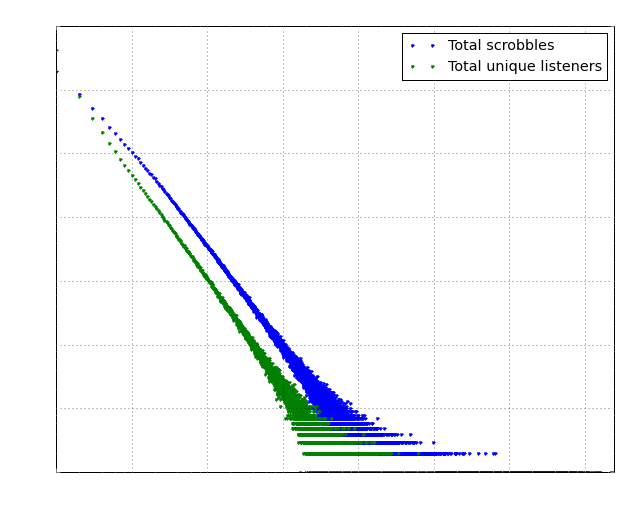

In [47]:
ax = artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,label='Total scrobbles')
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners')
ax.set_xlabel('Total scrobbles/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"\textbf{Artist} listener and scrobble frequency distributions")
l = ax.legend()
for text in l.get_texts():
    text.set_color("black")
ax.grid()  

In [46]:
x=artist_data.sort('scrobbles',ascending=False)['scrobbles'].cumsum()

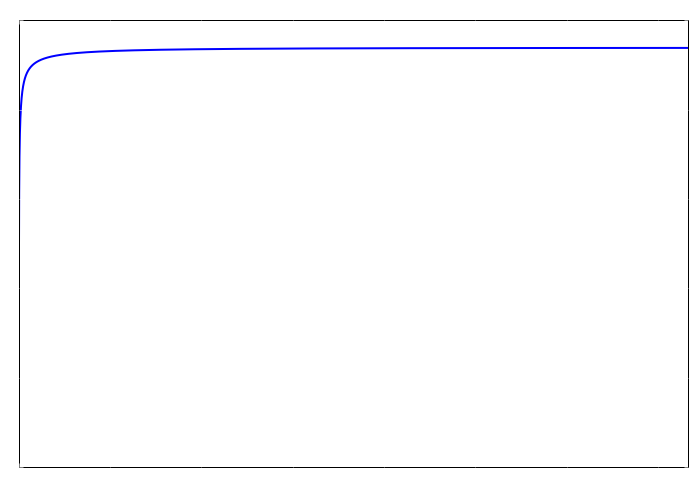

In [51]:
x.reset_index(drop=True).plot()

In [43]:
playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])

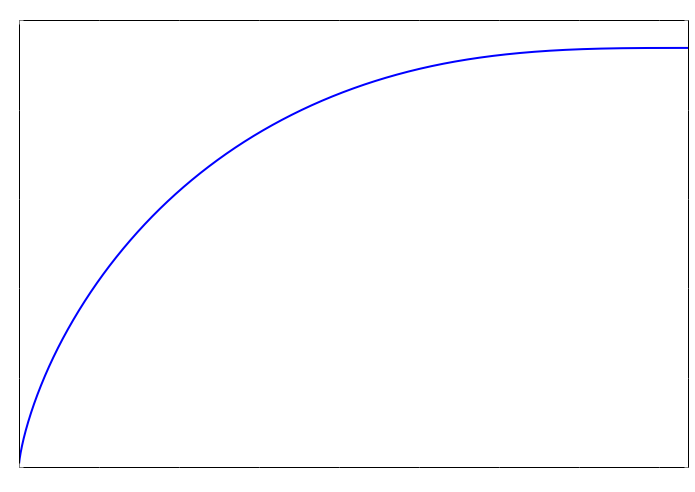

In [60]:
playcounts.sort(ascending=False)
playcounts.cumsum().reset_index(drop=True).plot()

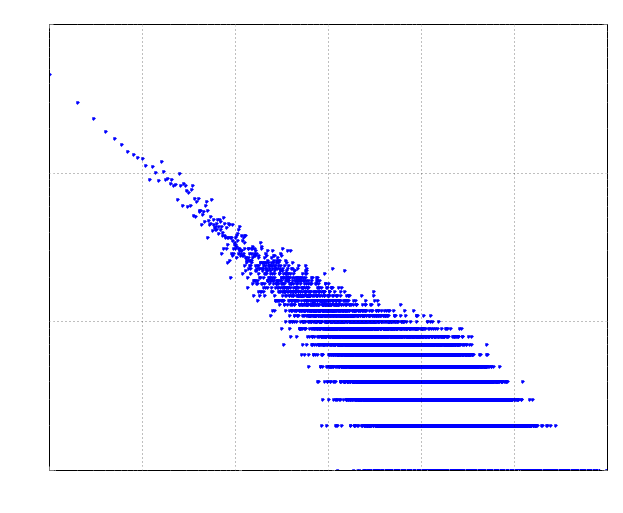

In [46]:
ax = playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True)
ax.set_xlabel('Total scrobbles')
ax.set_ylabel('Number of users')
ax.set_title(r"\textbf{User} scrobble frequency distribution")
ax.grid()

In [4]:
#mpl.rcParams

In [95]:
artist_data_trimmmed = artist_data[(artist_data['scrobbles']>=1000)&(artist_data['listeners']>=100)]
print len(artist_data),len(artist_data_trimmmed),float(len(artist_data_trimmmed))/len(artist_data)
print artist_data['scrobbles'].sum(),artist_data_trimmmed['scrobbles'].sum(),4430237213./4691766834

7333724 112312 0.0153144568844
4691766834 4430237213 0.944257754008


4684838731

In [14]:
import graphlab as gl
#docs = gl.SArray("../GenreModeling/data/doc_array/")

A newer version of GraphLab Create (v1.8.4) is available! Your current version is v1.5.2.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [102]:
#doc_sums = docs.apply(lambda x: sum(x.values()))
4423111456.0 / 4691766834

0.9427389749948516

In [103]:
print len(docs),len(playcounts)

145148 167244


In [49]:
topic_model = gl.load_model('../testData/lda_model_100/')
TOP_TERMS=20
top_terms_by_topic = topic_model.get_topics(num_words=TOP_TERMS,output_type='topic_probabilities').to_dataframe()
top_terms_by_topic['Rank'] = (-1*top_terms_by_topic).groupby('topic')['score'].transform(np.argsort)
top_terms_by_topic['New_str'] = top_terms_by_topic['word'] + top_terms_by_topic['score'].apply(' ({0:.3f})'.format)
new = top_terms_by_topic.sort(columns=['Rank', 'score'])[['New_str', 'topic','Rank']]
final = new.pivot(index='Rank', values='New_str', columns='topic')

In [50]:
final

topic,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Rank,,,,,,,,,,,,,,,,,,,,,
0,paramore (0.039),nine+inch+nails (0.056),disturbed (0.046),muse (0.037),die+%c3%84rzte (0.029),therion (0.028),the+prodigy (0.050),the+beatles (0.157),soda+stereo (0.012),iron+maiden (0.055),...,johann+sebastian+bach (0.032),coldplay (0.048),arctic+monkeys (0.112),in+flames (0.138),%e6%b5%9c%e5%b4%8e%e3%81%82%e3%82%86%e3%81%bf ...,three+days+grace (0.023),rammstein (0.061),sufjan+stevens (0.040),the+xx (0.030),air (0.026)
1,30+seconds+to+mars (0.035),alice+in+chains (0.033),metallica (0.042),brand+new (0.029),tocotronic (0.017),dark+tranquillity (0.027),pendulum (0.050),pink+floyd (0.078),gustavo+cerati (0.010),sonata+arctica (0.035),...,antonio+vivaldi (0.013),florence+%252b+the+machine (0.046),the+kooks (0.056),amorphis (0.029),%e5%ae%87%e5%a4%9a%e7%94%b0%e3%83%92%e3%82%ab%...,chevelle (0.017),anathema (0.053),the+shins (0.032),daft+punk (0.021),portishead (0.016)
2,green+day (0.030),faith+no+more (0.029),slipknot (0.039),coheed+and+cambria (0.021),wir+sind+helden (0.013),moonspell (0.025),linkin+park (0.040),the+doors (0.050),andr%c3%a9s+calamaro (0.009),kamelot (0.029),...,wolfgang+amadeus+mozart (0.010),kings+of+leon (0.035),the+strokes (0.052),sentenced (0.022),%eb%8f%99%eb%b0%a9%ec%8b%a0%ea%b8%b0 (0.014),red (0.015),the+gathering (0.037),elliott+smith (0.032),the+beatles (0.019),amon+tobin (0.012)
3,my+chemical+romance (0.029),pantera (0.025),papa+roach (0.032),death+cab+for+cutie (0.021),mando+diao (0.013),korpiklaani (0.019),deadmau5 (0.031),led+zeppelin (0.050),caf%c3%a9+tacvba (0.008),helloween (0.028),...,diana+krall (0.010),placebo (0.034),kings+of+leon (0.034),amon+amarth (0.018),%e6%a2%b6%e6%b5%a6%e7%94%b1%e8%a8%98 (0.014),switchfoot (0.015),paradise+lost (0.036),spoon (0.020),the+killers (0.016),morcheeba (0.012)
4,avril+lavigne (0.020),nirvana (0.020),limp+bizkit (0.030),sublime (0.019),jack+johnson (0.012),eluveitie (0.018),david+guetta (0.018),bob+dylan (0.034),babas%c3%b3nicos (0.007),dream+theater (0.027),...,billie+holiday (0.009),bloc+party (0.030),kasabian (0.030),ensiferum (0.016),%e8%8f%85%e9%87%8e%e3%82%88%e3%81%86%e5%ad%90 ...,p.o.d. (0.013),lacuna+coil (0.033),rilo+kiley (0.016),bon+iver (0.016),bj%c3%b6rk (0.011)
5,blink-182 (0.018),rage+against+the+machine (0.019),bullet+for+my+valentine (0.028),radiohead (0.017),kettcar (0.011),samael (0.014),ti%c3%absto (0.018),the+rolling+stones (0.031),h%c3%a9roes+del+silencio (0.007),children+of+bodom (0.025),...,thievery+corporation (0.008),interpol (0.023),max%c3%afmo+park (0.024),scar+symmetry (0.016),%e5%80%96%e7%94%b0%e4%be%86%e6%9c%aa (0.014),papa+roach (0.013),emilie+autumn (0.026),the+new+pornographers (0.016),vampire+weekend (0.015),nightmares+on+wax (0.011)
6,the+all-american+rejects (0.016),system+of+a+down (0.019),rise+against (0.028),system+of+a+down (0.017),deichkind (0.010),ensiferum (0.013),crystal+castles (0.015),queen (0.027),joaqu%c3%adn+sabina (0.007),edguy (0.019),...,chet+baker (0.008),death+cab+for+cutie (0.022),the+hives (0.020),arch+enemy (0.016),buck-tick (0.011),shinedown (0.012),in+flames (0.025),beck (0.015),gorillaz (0.015),rjd2 (0.010)
7,simple+plan (0.015),mastodon (0.018),rammstein (0.024),jack+johnson (0.016),tomte (0.009),opeth (0.012),infected+mushroom (0.015),jimi+hendrix (0.021),la+oreja+de+van+gogh (0.007),stratovarius (0.019),...,herbie+hancock (0.007),arcade+fire (0.022),the+smiths (0.020),kalmah (0.015),perfume (0.010),cold (0.012),theatre+of+tragedy (0.023),bon+iver (0.015),phoenix (0.015),beastie+boys (0.010)
8,lostprophets (0.013),pearl+jam (0.017),the+offspring (0.022),the+killers (0.014),blumentopf (0.009),norther (0.009),red+hot+chili+peppers (0.014),the+white+stripes (0.018),love+of+lesbian (0.007),hammerfall (0.018),...,johannes+brahms (0.006),the+national (0.021),the+fratellis (0.017),machinae+supremacy (0.014),%e6%a4%8e%e5%90%8d%e6%9e%97%e6%aa%8e (0.008),staind (0.012),my+dying+bride (0.023),cat+power (0.012),passion+pit

In [57]:
from urllib import unquote_plus
for idx in range(100):
    print ', '.join([unquote_plus(a).title() for a in list(final[idx][:5])])

Paramore (0.039), 30 Seconds To Mars (0.035), Green Day (0.030), My Chemical Romance (0.029), Avril Lavigne (0.020), Blink-182 (0.018)
Nine Inch Nails (0.056), Alice In Chains (0.033), Faith No More (0.029), Pantera (0.025), Nirvana (0.020), Rage Against The Machine (0.019)
Disturbed (0.046), Metallica (0.042), Slipknot (0.039), Papa Roach (0.032), Limp Bizkit (0.030), Bullet For My Valentine (0.028)
Muse (0.037), Brand New (0.029), Coheed And Cambria (0.021), Death Cab For Cutie (0.021), Sublime (0.019), Radiohead (0.017)
Die ÃRzte (0.029), Tocotronic (0.017), Wir Sind Helden (0.013), Mando Diao (0.013), Jack Johnson (0.012), Kettcar (0.011)
Therion (0.028), Dark Tranquillity (0.027), Moonspell (0.025), Korpiklaani (0.019), Eluveitie (0.018), Samael (0.014)
The Prodigy (0.050), Pendulum (0.050), Linkin Park (0.040), Deadmau5 (0.031), David Guetta (0.018), Tiã«Sto (0.018)
The Beatles (0.157), Pink Floyd (0.078), The Doors (0.050), Led Zeppelin (0.050), Bob Dylan (0.034), The Rolling S

In [11]:
top_terms_by_topic.sort?

In [3]:
N = 50
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist,squareform
from urllib import unquote_plus
features = np.load("../testData/mf_artist_features_100.npy")
model = MDS(n_components=2,dissimilarity='precomputed',n_jobs=1,n_init=10)
vocab_idx = {}
for line in open('../GenreModeling/data/vocab_idx'):
    line = line.strip().split('\t')
    #vocab_idx[int(line[1])] = unquote_plus(line[0]).title()
    vocab_idx[int(line[1])] = line[0]

distances = squareform(pdist(features[:N],metric='cosine'))
coords = model.fit_transform(distances)

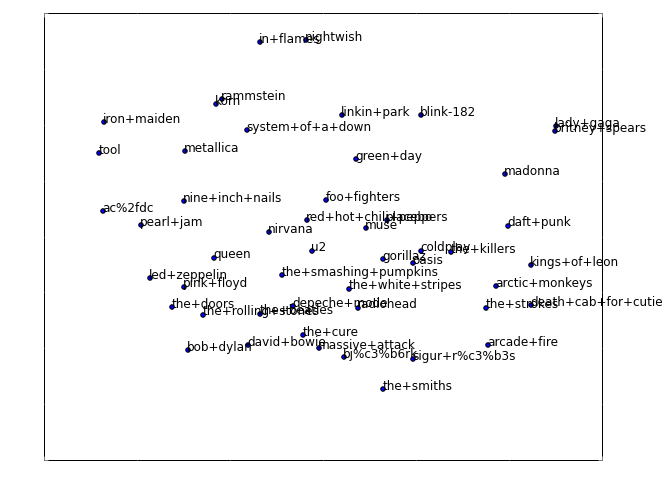

In [4]:
fig,ax=plt.subplots(1,1)
mx = float(artist_data['scrobbles'].max())
ax.scatter(coords[:,0],coords[:,1])
for i, (x, y) in enumerate(zip(coords[:, 0], coords[:, 1])):
    artist = vocab_idx[i]
    plt.annotate(
        artist,
        xy = (x, y), color='black',fontsize=12)#.*((N-i)/float(N)))
        #, xytext = (-20, 20),
        #textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),color='black')

In [20]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.charts import Scatter, output_file, show
from bokeh.sampledata.autompg import autompg as df

coords_df = pd.DataFrame(coords)
coords_df.columns = ['x','y']
p=Scatter(coords,x='x',y='y')


In [13]:
import bokeh
bokeh.__version__

'0.11.1'